In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('sales_channel.csv')

In [3]:
df

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


# Null-value

In [4]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

<AxesSubplot:>

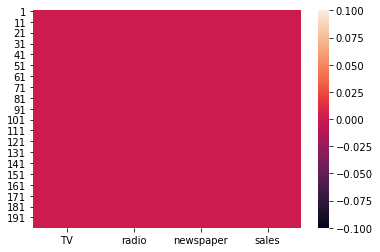

In [5]:
sns.heatmap(df.isnull())

# Remove-out skewness

In [6]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
from scipy.stats import boxcox

In [9]:
df['newspaper']=boxcox(df['newspaper'],.5)

In [10]:
df.skew()


TV          -0.069853
radio        0.094175
newspaper    0.062388
sales        0.407571
dtype: float64

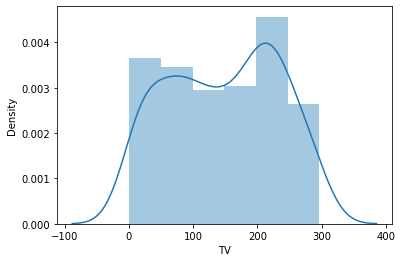

In [11]:
sns.distplot(df['TV'])
plt.show()

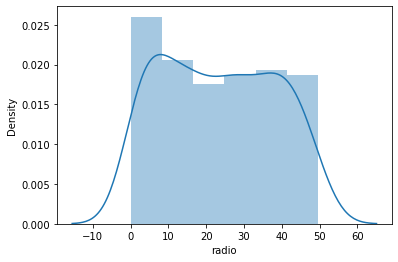

In [12]:
sns.distplot(df['radio'])
plt.show()

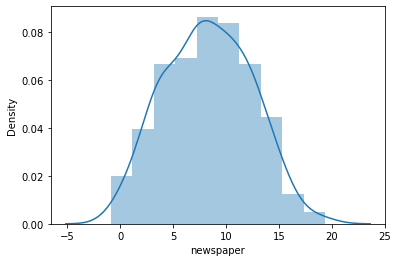

In [13]:
sns.distplot(df['newspaper'])
plt.show()

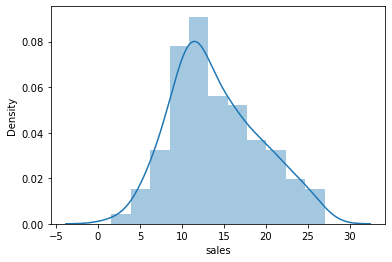

In [14]:
sns.distplot(df['sales'])
plt.show()

# Remove-out Outliers

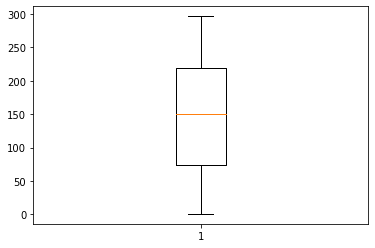

In [15]:
plt.boxplot(df['TV'])
plt.show()

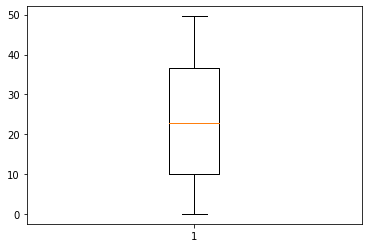

In [16]:
plt.boxplot(df['radio'])
plt.show()

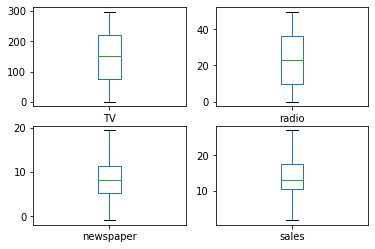

In [17]:
df.plot(kind='box',subplots=True,layout=(2,2))
plt.show()

In [18]:
from scipy.stats import zscore

In [19]:
z=np.abs(zscore(df))
z

array([[9.69852266e-01, 9.81522472e-01, 1.56309461e+00, 1.55205313e+00],
       [1.19737623e+00, 1.08280781e+00, 7.74855194e-01, 6.96046111e-01],
       [1.51615499e+00, 1.52846331e+00, 1.56604912e+00, 9.07405869e-01],
       [5.20496822e-02, 1.21785493e+00, 1.23357596e+00, 8.60330287e-01],
       [3.94182198e-01, 8.41613655e-01, 1.23036007e+00, 2.15683025e-01],
       [1.61540845e+00, 1.73103399e+00, 1.73106889e+00, 1.31091086e+00],
       [1.04557682e+00, 6.43904671e-01, 1.43678801e-01, 4.27042783e-01],
       [3.13436589e-01, 2.47406325e-01, 8.52652825e-01, 1.58039455e-01],
       [1.61657614e+00, 1.42906863e+00, 2.03568892e+00, 1.77205942e+00],
       [6.16042873e-01, 1.39530685e+00, 2.63332869e-01, 6.57617064e-01],
       [9.45155670e-01, 1.17923146e+00, 1.08436840e-01, 1.04190753e+00],
       [7.90028350e-01, 4.96973404e-02, 1.54396138e+00, 6.48970529e-01],
       [1.43908760e+00, 7.99208859e-01, 1.46436938e+00, 9.26620392e-01],
       [5.78501712e-01, 1.05768905e+00, 1.20797302e

In [20]:
threashold=3
print(np.where(z>3))

(array([], dtype=int64), array([], dtype=int64))


# correlation

In [21]:
corr=df.corr()
corr

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.045976,0.782224
radio,0.054809,1.000000,0.313430,0.576223
newspaper,0.045976,0.313430,1.000000,0.204725
sales,0.782224,0.576223,0.204725,1.000000


<AxesSubplot:>

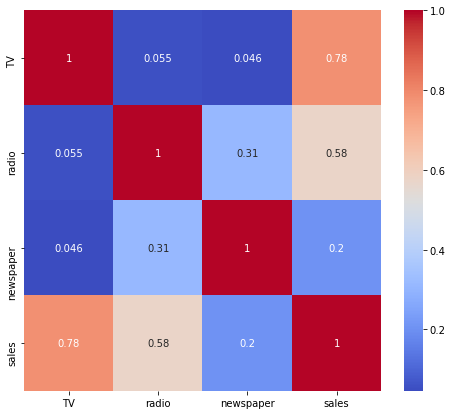

In [22]:
figure=plt.figure(figsize=(8,7))
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [26]:
x=df.drop('sales',axis=1)
y=df['sales']

# Train_Test_Split

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=22)

In [28]:
x_train.shape,x_test.shape

((160, 3), (40, 3))

# Linear Regression Algorithm

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [30]:
lr=LinearRegression()

In [31]:
lr.fit(x_train,y_train)

LinearRegression()

In [32]:
pred=lr.predict(x_test)

In [34]:
print('mean squared error',mean_squared_error(y_test,pred))
print('mean absolute error',mean_absolute_error(y_test,pred))
print('r2 score',r2_score(pred,y_test))

mean squared error 2.4818110037902583
mean absolute error 1.1799005594843877
r2 score 0.9029013556207331


In [36]:
from sklearn.model_selection import cross_val_score

In [37]:
score=cross_val_score(lr,x,y,cv=5)

In [39]:
print(score)
print(score.mean())
print(score.std())


[0.87809171 0.91744186 0.92982697 0.81591747 0.89538764]
0.8873331295445761
0.03990673561316692


# Ridge

In [40]:
from sklearn.linear_model import Ridge

In [41]:
rd=Ridge()

In [42]:
rd.fit(x_train,y_train)

Ridge()

In [43]:
pred=rd.predict(x_test)

In [44]:
print('mean squared error',mean_squared_error(y_test,pred))
print('mean absolute error',mean_absolute_error(y_test,pred))
print('r2 score',r2_score(pred,y_test))

mean squared error 2.481748462109641
mean absolute error 1.1798931449403514
r2 score 0.902901639692439


In [45]:
score=cross_val_score(rd,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.87809339 0.91744187 0.92982721 0.81592601 0.895384  ]
0.8873344978853581
0.039903506107037585


# Lasso

In [46]:
from sklearn.linear_model import Lasso

In [47]:
ls=Lasso()

In [48]:
ls.fit(x_train,y_train)

Lasso()

In [49]:
pred=ls.predict(x_test)

In [50]:
print('mean_squared_error',mean_squared_error(y_test,pred))
print('mean_absolute_error',mean_absolute_error(y_test,pred))
print('r2_score',r2_score(y_test,pred))

mean_squared_error 2.4172397945943147
mean_absolute_error 1.164772492952399
r2_score 0.9199167841812638


In [51]:
score=cross_val_score(ls,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.88159827 0.91792464 0.93002502 0.82370663 0.89241677]
0.8891342630412222
0.037011568448919716


In [52]:
from sklearn.linear_model import ElasticNet

In [53]:
en=ElasticNet()

In [54]:
en.fit(x_train,y_train)

ElasticNet()

In [55]:
pred=en.predict(x_test)

In [56]:
print('mean_squared_error',mean_squared_error(pred,y_test))
print('mean_absolute_error',mean_absolute_error(y_test,pred))
print('r2_score',r2_score(y_test,pred))

mean_squared_error 2.4309051397110824
mean_absolute_error 1.1661329267978424
r2_score 0.9194640509502989


In [60]:
score=cross_val_score(en,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())


[0.88145684 0.91806469 0.92996988 0.82306879 0.89365928]
0.889243894546299
0.037278740405920247


# support vector machine

In [61]:
from sklearn.svm import SVR

In [62]:
svr=SVR()

In [63]:
svr.fit(x_train,y_train)

SVR()

In [64]:
pred=svr.predict(x_test)

In [66]:
print('mean_squared_error',mean_squared_error(y_test,pred))
print('mean_absolute_error',mean_absolute_error(y_test,pred))
print('r2_score',r2_score(y_test,pred))

mean_squared_error 4.563945346162763
mean_absolute_error 1.5072063558772182
r2_score 0.848796374708447


In [67]:
score=cross_val_score(svr,x,y,cv=5)

In [68]:
print(score)
print(score.mean())
print(score.std())

[0.85316592 0.88027864 0.82461163 0.84955315 0.7850179 ]
0.8385254476399322
0.0320497551480332


# Decision Tree Regressor

In [70]:
from sklearn.tree import DecisionTreeRegressor

In [77]:
dtr=DecisionTreeRegressor()

In [78]:
dtr.fit(x_train,y_train)


DecisionTreeRegressor()

In [80]:
pred=dtr.predict(x_test)

In [83]:
print('mean_squared_error',mean_squared_error(y_test,pred))
print('mean_absolute_error',mean_absolute_error(y_test,pred))
print('r2_score',r2_score(y_test,pred))

mean_squared_error 1.795500000000001
mean_absolute_error 1.0300000000000002
r2_score 0.9405150393750351


In [85]:
score=cross_val_score(dtr,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.96542215 0.96022811 0.93695243 0.95547485 0.97017298]
0.9576501052942525
0.011462973244283902


# RandomForest Regressor

In [86]:
from sklearn.ensemble import RandomForestRegressor

In [87]:
rf=RandomForestRegressor()

In [88]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [89]:
pred=rf.predict(x_test)

In [94]:
print('mean_squared_error',mean_squared_error(y_test,pred))
print('mean_absolute_error',mean_absolute_error(y_test,pred))  
print('r2 score',r2_score(pred,y_test))

mean_squared_error 0.44764244999999914
mean_absolute_error 0.5353999999999989
r2 score 0.9848219042975077


In [95]:
score=cross_val_score(dtr,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.95590478 0.960712   0.94333855 0.94206943 0.96449967]
0.953304884323647
0.009083076109610124


# Hyperparameter Tuning

In [97]:
from sklearn.model_selection import GridSearchCV

In [98]:
model=RandomForestRegressor()

In [104]:
param={'n_estimators':[10,30,50,70,100],'criterion':['mse','mae'],'min_samples_split':[1,2,3,4,5],'min_samples_leaf':[1,2,3,4,5]}

In [105]:
grid=GridSearchCV(estimator=model,param_grid=param,cv=5)


In [106]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5],
                         'n_estimators': [10, 30, 50, 70, 100]})

In [108]:
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.criterion)
print(grid.best_params_)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5],
                         'n_estimators': [10, 30, 50, 70, 100]})
0.9760107503596446
mae
{'criterion': 'mae', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [109]:
import joblib

In [110]:
joblib.dump(RandomForestRegressor,'Advertising_sales.obj')

['Advertising_sales.obj']